 # Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
from cmdstanpy import CmdStanModel
import arviz as az

import matplotlib.pyplot as plt

In [3]:
with open("fecondità_finale", "rb") as f:
    dataset=pd.read_csv(f)
    
dataset = dataset.sort_values(by=['Territorio', 'TIME'])
dataset

,Territorio,TIME,età.media.delle.madri.al.parto,età.media.dei.padri.alla.nascita.del.figlio,tasso.di.fecondità.totale,tasso.di.inattività.dei.maschi,tasso.di.inattività.delle.femmine,tasso.di.inattività.totale,tasso.di.occupazione.dei.maschi,tasso.di.occupazione.delle.femmine,tasso.di.occupazione.totale
930,Agrigento,2011,30.94,34.80,1.37,42.911800,75.561168,59.924924,47.392418,19.828757,33.029603
931,Agrigento,2012,30.73,34.57,1.35,43.934839,74.366121,59.780301,45.282895,20.513632,32.385627
932,Agrigento,2013,31.09,34.78,1.27,46.361107,73.567265,60.518499,43.469198,19.889053,31.198656
933,Agrigento,2014,30.99,35.06,1.33,47.098738,72.427712,60.272133,39.673492,20.296449,29.595648
934,Agrigento,2015,31.14,34.97,1.27,45.169256,75.916130,61.148536,40.057236,18.153835,28.674135
...,...,...,...,...,...,...,...,...,...,...,...
625,Viterbo,2016,31.99,35.76,1.23,39.518267,60.635768,50.408778,52.769263,32.263986,42.194134
626,Viterbo,2017,32.17,35.73,1.16,41.158020,61.241767,51.511845,51.680541,33.283508,42.195912
627,Viterbo,2018,32.05,35.64,1.20,42.945825,61.820030,52.659989,50.508888,33.458828,41.733539
628,Viterbo,2019,31.97,35.51,1.11,44.935350,63.118101,54.287825,49.777042,32.974065,41.133933


In [4]:
I=106
T=10
H=10
P=1
Y_vec=np.array(dataset["tasso.di.fecondità.totale"])
Y = np.zeros((I,T))
for i in range(I):
    for t in range(T):
        Y[i,t] = Y_vec[T*i+t]
Y

array([[1.37, 1.35, 1.27, ..., 1.29, 1.24, 1.26],
       [1.37, 1.36, 1.3 , ..., 1.22, 1.17, 1.15],
       [1.44, 1.43, 1.36, ..., 1.24, 1.21, 1.21],
       ...,
       [1.28, 1.36, 1.24, ..., 1.29, 1.25, 1.3 ],
       [1.51, 1.53, 1.47, ..., 1.39, 1.33, 1.34],
       [1.31, 1.31, 1.23, ..., 1.2 , 1.11, 1.09]])

In [38]:
#maxY=np.max(Y)
#minY=np.min(Y)
#Y=(Y-minY)/(maxY-minY)

In [39]:
#X1=np.array(dataset["età.media.delle.madri.al.parto"])
#maxX1=np.max(X1)
#minX1=np.min(X1)
#X1=(X1-minX1)/(maxX1-minX1)
#X2=np.array(dataset["età.media.dei.padri.alla.nascita.del.figlio"])
#maxX2=np.max(X2)
#minX2=np.min(X2)
#X2=(X2-minX2)/(maxX2-minX2)
#X3=np.array(dataset["tasso.di.occupazione.totale"])
#maxX3=np.max(X3)
#minX3=np.min(X3)
#X3=(X3-minX3)/(maxX3-minX3)

In [5]:
#X=np.ones((1060,4))
#X[:,1]=X1
#X[:,2]=X2
#X[:,3]=X3
#X

X=np.ones((106,10,2))
X3=np.array(dataset["tasso.di.occupazione.totale"])
for i in range(I):
    for t in range(T):
        X[i,t,1] = X3[T*i+t]
X

array([[[ 1.      , 33.029603],
        [ 1.      , 32.385627],
        [ 1.      , 31.198656],
        ...,
        [ 1.      , 30.004547],
        [ 1.      , 31.142074],
        [ 1.      , 30.306778]],

       [[ 1.      , 46.27013 ],
        [ 1.      , 46.565086],
        [ 1.      , 44.3959  ],
        ...,
        [ 1.      , 46.205823],
        [ 1.      , 46.077288],
        [ 1.      , 44.499835]],

       [[ 1.      , 48.2398  ],
        [ 1.      , 48.547481],
        [ 1.      , 47.630386],
        ...,
        [ 1.      , 48.115008],
        [ 1.      , 47.126603],
        [ 1.      , 46.690966]],

       ...,

       [[ 1.      , 32.929587],
        [ 1.      , 30.230937],
        [ 1.      , 29.642365],
        ...,
        [ 1.      , 33.325547],
        [ 1.      , 31.257582],
        [ 1.      , 28.053823]],

       [[ 1.      , 52.965195],
        [ 1.      , 51.166939],
        [ 1.      , 48.448981],
        ...,
        [ 1.      , 51.734455],
        [ 1.      

In [6]:
dataset

,Territorio,TIME,età.media.delle.madri.al.parto,età.media.dei.padri.alla.nascita.del.figlio,tasso.di.fecondità.totale,tasso.di.inattività.dei.maschi,tasso.di.inattività.delle.femmine,tasso.di.inattività.totale,tasso.di.occupazione.dei.maschi,tasso.di.occupazione.delle.femmine,tasso.di.occupazione.totale
930,Agrigento,2011,30.94,34.80,1.37,42.911800,75.561168,59.924924,47.392418,19.828757,33.029603
931,Agrigento,2012,30.73,34.57,1.35,43.934839,74.366121,59.780301,45.282895,20.513632,32.385627
932,Agrigento,2013,31.09,34.78,1.27,46.361107,73.567265,60.518499,43.469198,19.889053,31.198656
933,Agrigento,2014,30.99,35.06,1.33,47.098738,72.427712,60.272133,39.673492,20.296449,29.595648
934,Agrigento,2015,31.14,34.97,1.27,45.169256,75.916130,61.148536,40.057236,18.153835,28.674135
...,...,...,...,...,...,...,...,...,...,...,...
625,Viterbo,2016,31.99,35.76,1.23,39.518267,60.635768,50.408778,52.769263,32.263986,42.194134
626,Viterbo,2017,32.17,35.73,1.16,41.158020,61.241767,51.511845,51.680541,33.283508,42.195912
627,Viterbo,2018,32.05,35.64,1.20,42.945825,61.820030,52.659989,50.508888,33.458828,41.733539
628,Viterbo,2019,31.97,35.51,1.11,44.935350,63.118101,54.287825,49.777042,32.974065,41.133933


In [7]:
with open("proximity_matrix", "rb") as f:
    W_raw=pd.read_csv(f)

In [8]:
W_raw=np.matrix(W_raw)
W_raw

matrix([[1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 1]])

# Prepare data for model

In [9]:
for i in range(106):
  W_raw[i,i] = 0

print(np.diag(W_raw))


Wt = W_raw.transpose()
(Wt == W_raw).all()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


True

In [10]:
# compute Qinv
one_vector = np.ones(shape = (I,1))
B = np.matmul(W_raw , one_vector)
A =  np.diagflat(np.array(B))
W_intermedia = A - W_raw


rho = 0.95
Q = rho * W_intermedia  + (1-rho) * np.eye(I)
Qinv = np.linalg.inv(Q)
# Qinv.shape
W_intermedia.shape

(106, 106)

In [11]:
#Qinv must be positive definite
for i in range(I):
  for j in range(I):
    Qinv[j,i] = Qinv[i,j]

Qinv=np.matrix(Qinv)
Qinvt = Qinv.transpose()
(Qinv == Qinvt).all()

np.linalg.eig(Qinv)

(array([20.        , 20.        , 12.60794931, 20.        ,  6.17876486,
         4.58245534,  3.37585462,  2.5397937 ,  2.224881  ,  1.62768346,
         1.44498776,  1.08911544,  1.14161895,  1.07987285,  0.96573272,
         0.89291888,  0.78141176,  0.76100084,  0.56133708,  0.61795216,
         0.60710504,  0.54304618,  0.52594263,  0.50890615,  0.48144543,
         0.47039181,  0.46071941,  0.34482759,  0.51282051,  0.41693047,
         0.40910669,  0.38944954,  0.36167474,  0.35469316,  0.35285908,
         0.34482759,  0.29041118,  0.30862327,  0.30565764,  0.29530102,
         0.10007576,  0.28108874,  0.27573182,  0.24064173,  0.1100721 ,
         0.11169479,  0.26315676,  0.25240545,  0.2471105 ,  0.24318715,
         0.23776567,  0.24068966,  0.11760528,  0.25913494,  0.23241926,
         0.11966603,  0.23137294,  0.22670922,  0.22319844,  0.12162216,
         0.18909203,  0.21308395,  0.20716014,  0.21111733,  0.21083291,
         0.12487405,  0.20373348,  0.12804866,  0.1

In [12]:
mu_0 = np.zeros(P+1) #as in the paper
mu_w_1 = np.zeros(I) #as in the paper
sigma_0 = 1 #covariance matrix


data = {
    "I": I,
    "T": T,
    "P": P,
    "H": H,
    "y": Y,
    "X": X,
    "W_raw": W_raw,
    "mu_0": mu_0,
    "sigma_0": sigma_0,
    "mu_w_1": mu_w_1,
    "a_alpha": 3,
    "b_alpha": 2,
    "a_tau2": 3,
    "b_tau2": 3,
    "a_sigma2": 3,
    "b_sigma2": 2,
    "rho": 0.95,
    "a_xi": 1,
    "b_xi": 1,
    "inv_Q": Qinv
}

# Model

In [13]:
dp_mix_stan = """
data
{
    int I; // number of areal locations
    int T; // number of time steps
    int P; // number of covariates
    int H; // truncation of stick breaking construction dp
    
    vector[T] y[I]; // for each prov the asnwer at all the time
    matrix[T,P+1] X[I]; // for each province its covariance matrix
      
    // hyperpar vector of regressors
    vector[P+1] mu_0; 
    real        sigma_0;
    
    // w_1
    vector[I] mu_w_1;
    
    // alpha
    real a_alpha;
    real b_alpha;
    
    // tau^2
    real a_tau2;
    real b_tau2;
    
    // sigma^2
    real a_sigma2;
    real b_sigma2;
    
    // rho
    real rho;
    
    //xis
    real a_xi;
    real b_xi;

    // Qinv
    matrix[I,I] inv_Q;
}

transformed data {
    matrix[I, I] L;
    L = cholesky_decompose(inv_Q);
}

parameters
{
    real<lower=0> alpha;
    real<lower=0> sigma2; 
    real<lower=0> tau2;  
    
    // autoregressive coefficients 
    real<lower=0,upper=1> xi_constructor;
    
    // betas for the mixture of the dirichlet process
    matrix[P+1,H]  betas;

    
    // for the construction of the dirichlet process
    vector<lower=0,upper=1>[H-1] vs;
    
    // for the random effect construction 
    vector[I] alpha_w;
}

transformed parameters
{   
    // weights stick breaking construction
    simplex[H] omegas; 
    
    // sbc stuff
    vector[H-1] cumprod_one_mv;    
    cumprod_one_mv = exp(cumulative_sum(log1m(vs)));
    
    omegas[1] = vs[1];
    omegas[2:(H-1)] = vs[2:(H-1)] .* cumprod_one_mv[1:(H-2)];
    omegas[H] = cumprod_one_mv[H-1];
    
    real xi = 2*xi_constructor-1;
    
    // random effects
    matrix[I,T]                ws_tmp;
    
    ws_tmp[1:I,1] =  mu_w_1 + L*alpha_w;
    
    for (t in 2:T)
        ws_tmp[1:I,t] = ws_tmp[1:I,t-1]*xi + L*alpha_w; 
    
    matrix[T,I]   ws = (ws_tmp)'; //otherwise I have to transpose in the for loop at each iteration
    
    real sigma = sqrt(sigma2);
    
    real tau = sqrt(tau2);
    
    matrix[T,I]  means[H];

    for (i in 1:I) {
        for (h in 1:H) 
            means[h,1:T,i] = X[i]*betas[1:(P+1),h] + ws[1:T,i];
    }

}

model
{
    alpha  ~ gamma(a_alpha,b_alpha);
    sigma2 ~ inv_gamma(a_sigma2,b_sigma2);
    tau2   ~ inv_gamma(a_tau2,b_tau2);
    vs     ~ beta(1,alpha);
    alpha_w ~ normal(0, tau);
    xi_constructor ~ beta(a_xi,b_xi);
    
    for (h in 1:H)
        betas[1:(P+1),h] ~ normal(mu_0, sigma_0);
    
    vector[H] log_probs;
    for (i in 1:I) {
        
        for (h in 1:H) 
            log_probs[h] = log(omegas[h]) + 
            normal_lpdf(y[i] | means[h,1:T,i], sigma);
        
        target += log_sum_exp(log_probs);
    }
}

generated quantities 
{   
    // vector of cluster allocations
    vector[I] s;
    
    matrix[H,I] log_probs; 
    for (i in 1:I) 
    {
        for (h in 1:H) 
            log_probs[h,i] = log(omegas[h]) + 
            normal_lpdf(y[i] | means[h,1:T,i], sigma);
    
    }
    for (i in 1:I)
        s[i] = categorical_rng(softmax(log_probs[1:H,i]));
        
        
    // log likelihood
    vector[I] log_lik;
    for (i in 1:I)
      log_lik[i] = log_sum_exp(log_probs[1:H,i]);
    

    
}
"""

stan_file = "Sp_corr.stan"

with open(stan_file, "w") as fp:
    fp.write(dp_mix_stan)
    
dp_mix = CmdStanModel(stan_file=stan_file)

11:25:10 - cmdstanpy - INFO - compiling stan file /home/riccardo/bayesian-project/Sp_corr.stan to exe file /home/riccardo/bayesian-project/Sp_corr
11:25:40 - cmdstanpy - INFO - compiled model executable: /home/riccardo/bayesian-project/Sp_corr
11:25:40 - cmdstanpy - WARNING - Stan compiler has produced 3 warnings:
11:25:40 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/riccardo/bayesian-project/Sp_corr.hpp /home/riccardo/bayesian-project/Sp_corr.stan
Warning in '/home/riccardo/bayesian-project/Sp_corr.stan', line 9, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/riccardo/bayesian-project/Sp_corr.stan', line 10, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be rem

In [15]:
fit = dp_mix.sample(data
                    , iter_warmup = 2000
                    , iter_sampling = 2000
#                     , adapt_init_phase = 1500
#                     , adapt_metric_window = 1500
#                     , adapt_step_size = 1500
#                     , show_console = True
#                     , chains=4
#                     , adapt_delta=0.9
#                     , step_size = 0.2
#                     , max_treedepth = 100
                   )

11:37:23 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:40:29 - cmdstanpy - ERROR - Chain [4] error: terminated by signal 2 Unknown error -2
11:40:29 - cmdstanpy - ERROR - Chain [2] error: terminated by signal 2 Unknown error -2
11:40:29 - cmdstanpy - ERROR - Chain [3] error: terminated by signal 2 Unknown error -2
11:40:29 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 2 Unknown error -2


KeyboardInterrupt: 

# Model Saving

In [24]:
s = (fit.s).astype(int)

np.savetxt("true_dataset_posterior_s.csv", s, delimiter=",")
s.shape

(8000, 106)

In [ ]:
np.savetxt("true_dataset_posterior_betas.csv", fit.betas, delimiter=",")
fit.betas.shape

In [ ]:
np.savetxt("true_dataset_posterior_xi.csv", fit.xi, delimiter=",")
np.savetxt("true_dataset_posterior_alpha.csv", fit.alpha, delimiter=",")

# Plots

array([[<AxesSubplot:title={'center':'betas\n0, 0'}>,
        <AxesSubplot:title={'center':'betas\n0, 0'}>],
       [<AxesSubplot:title={'center':'betas\n0, 1'}>,
        <AxesSubplot:title={'center':'betas\n0, 1'}>],
       [<AxesSubplot:title={'center':'betas\n0, 2'}>,
        <AxesSubplot:title={'center':'betas\n0, 2'}>],
       [<AxesSubplot:title={'center':'betas\n0, 3'}>,
        <AxesSubplot:title={'center':'betas\n0, 3'}>],
       [<AxesSubplot:title={'center':'betas\n0, 4'}>,
        <AxesSubplot:title={'center':'betas\n0, 4'}>],
       [<AxesSubplot:title={'center':'betas\n0, 5'}>,
        <AxesSubplot:title={'center':'betas\n0, 5'}>],
       [<AxesSubplot:title={'center':'betas\n0, 6'}>,
        <AxesSubplot:title={'center':'betas\n0, 6'}>],
       [<AxesSubplot:title={'center':'betas\n0, 7'}>,
        <AxesSubplot:title={'center':'betas\n0, 7'}>],
       [<AxesSubplot:title={'center':'betas\n0, 8'}>,
        <AxesSubplot:title={'center':'betas\n0, 8'}>],
       [<AxesSubplo

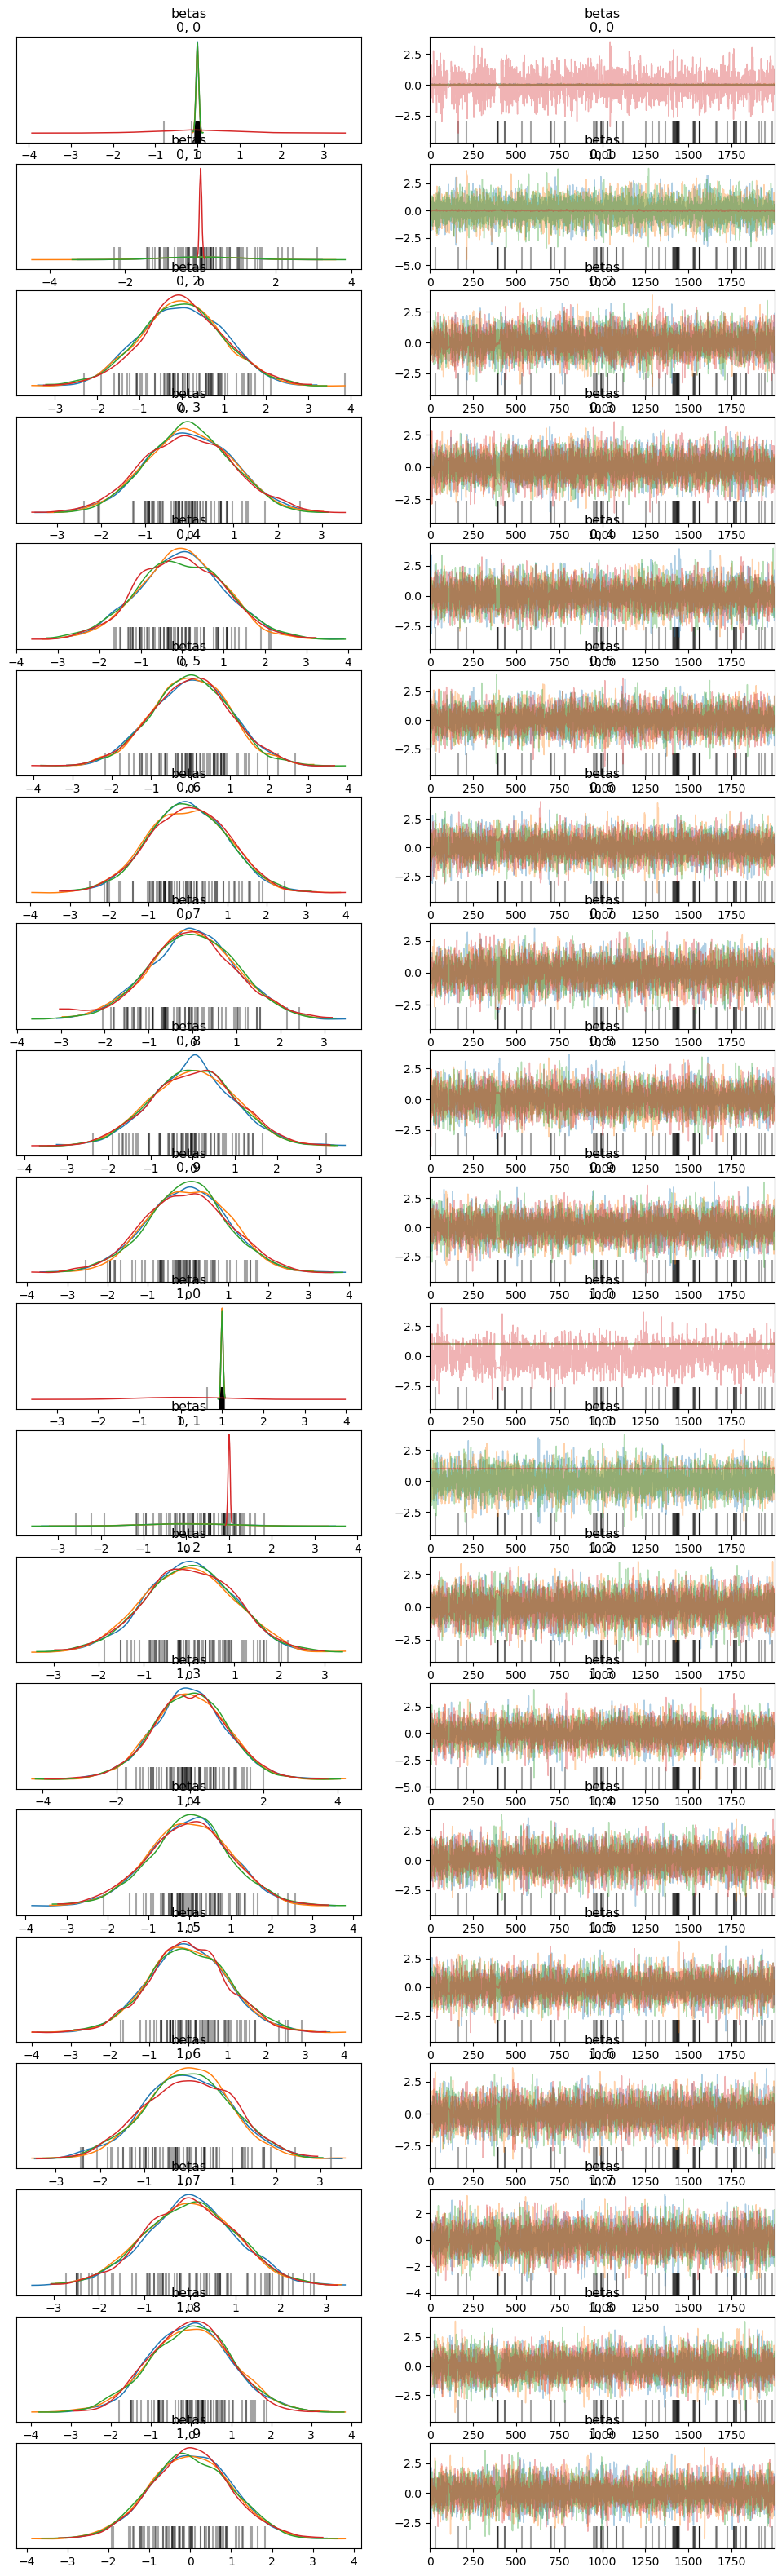

In [25]:
fit_az = az.from_cmdstanpy(fit)
az.plot_trace(fit_az,var_names=["betas"], compact=False)

In [ ]:
fit_az = az.from_cmdstanpy(fit)
az.plot_posterior(fit_az,var_names=["betas"])